# Earth Science Citation Replication Project

## 0. Install Packages

In [2]:
import csv
import pandas as pd
from time import sleep
import re
import os
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

## 1. Sampling

### Import file
Next, import the csv file that includes your records from Web of Science.

In [3]:
#Import csv

ucb_data = pd.read_csv("Institution_Reference_Files/Berkeley_References.csv", encoding="ISO-8859-1")
cub_data = pd.read_csv("Institution_Reference_Files/Boulder_References.csv", encoding="ISO-8859-1")
uh_data = pd.read_csv("Institution_Reference_Files/Houston_References.csv", encoding="ISO-8859-1")
ucla_data = pd.read_csv("Institution_Reference_Files/UCLA_References.csv", encoding="ISO-8859-1")

### Explore the data

Use the campus csv file to determine the top 10 journals published in by affiliated researchers. Find information about Web of Science field/header tags here: https://images.webofknowledge.com/images/help/WOS/hs_wos_fieldtags.html

In [3]:
#SO refers to source aka journal title

ucbTotal = len(ucb_data)
titles = ucb_data['SO'].value_counts()
titles.head(10)

GEOPHYSICAL RESEARCH LETTERS                   461
ATMOSPHERIC CHEMISTRY AND PHYSICS              153
WATER RESOURCES RESEARCH                       150
EARTH AND PLANETARY SCIENCE LETTERS            133
JOURNAL OF GEOPHYSICAL RESEARCH-SOLID EARTH    132
GEOCHIMICA ET COSMOCHIMICA ACTA                128
JOURNAL OF GEOPHYSICAL RESEARCH-ATMOSPHERES    100
GEOPHYSICAL JOURNAL INTERNATIONAL               96
ENVIRONMENTAL RESEARCH LETTERS                  92
ATMOSPHERIC ENVIRONMENT                         72
Name: SO, dtype: int64

In [7]:
cubTotal = len(cub_data)
titles_cub = cub_data['SO'].value_counts()
titles_cub.head(10)

GEOPHYSICAL RESEARCH LETTERS                       843
ATMOSPHERIC CHEMISTRY AND PHYSICS                  643
JOURNAL OF GEOPHYSICAL RESEARCH-ATMOSPHERES        600
ATMOSPHERIC MEASUREMENT TECHNIQUES                 204
JOURNAL OF CLIMATE                                 190
BULLETIN OF THE AMERICAN METEOROLOGICAL SOCIETY    139
WATER RESOURCES RESEARCH                           116
ATMOSPHERIC ENVIRONMENT                            111
MONTHLY WEATHER REVIEW                             105
EARTH AND PLANETARY SCIENCE LETTERS                 95
Name: SO, dtype: int64

In [4]:
uhTotal = len(uh_data)
titles_uh = uh_data['SO'].value_counts()
titles_uh.head(10)

GEOPHYSICS                                                                          77
ATMOSPHERIC ENVIRONMENT                                                             62
ATMOSPHERIC CHEMISTRY AND PHYSICS                                                   53
JOURNAL OF GEOPHYSICAL RESEARCH-ATMOSPHERES                                         45
EARTH AND PLANETARY SCIENCE LETTERS                                                 30
GEOCHIMICA ET COSMOCHIMICA ACTA                                                     28
GEOPHYSICAL RESEARCH LETTERS                                                        26
IEEE TRANSACTIONS ON GEOSCIENCE AND REMOTE SENSING                                  25
CRYSTAL GROWTH & DESIGN                                                             25
IEEE JOURNAL OF SELECTED TOPICS IN APPLIED EARTH OBSERVATIONS AND REMOTE SENSING    25
Name: SO, dtype: int64

In [5]:
uclaTotal = len(ucla_data)
titles_ucla = ucla_data['SO'].value_counts()
titles_ucla.head(10)

GEOPHYSICAL RESEARCH LETTERS                   568
JOURNAL OF GEOPHYSICAL RESEARCH-ATMOSPHERES    134
ATMOSPHERIC CHEMISTRY AND PHYSICS              123
JOURNAL OF CLIMATE                              99
CLIMATE DYNAMICS                                94
EARTH AND PLANETARY SCIENCE LETTERS             88
GEOCHIMICA ET COSMOCHIMICA ACTA                 78
METEORITICS & PLANETARY SCIENCE                 73
JOURNAL OF GEOPHYSICAL RESEARCH-PLANETS         65
JOURNAL OF GEOPHYSICAL RESEARCH-OCEANS          63
Name: SO, dtype: int64

### Create a sample

Our total number of records is: 17648 

Let's compute the proportion of the total for each institution.

In [8]:
total = ucbTotal + cubTotal + uclaTotal + uhTotal
CUB = cubTotal/total
UCB = ucbTotal/total
UCLA = uclaTotal/total
UH = uhTotal/total

print('Total = ',total)
print('CUB = ',CUB)
print('UCB = ',UCB)
print('UCLA = ',UCLA)
print('UH = ',UH)

Total =  17657
CUB =  0.42130599762133997
UCB =  0.2833437163731098
UCLA =  0.2192331653168715
UH =  0.07611712068867871


|Institution | Number of Records | Proportion of Total | Sample (n = 1000)|
|:--- | ---: | ---: | ---: |
|CU Boulder | 7439 | .42 | 420|
|UC Berkeley | 5002 | .28 | 280|
|UCLA | 3862 | .22 | 220 |
|UH | 1344 | .08 | 80 |

By using `dataframe.sample`, we can generate a random sample. Our total sample will be 1000 records.
Create your sample based on your institution's proportion of the whole set of records. Use that proportion to calculate your n out of 1000.

In [9]:
#Example:
ucb_sample = ucb_data.sample(n = 280)
ucb_sample

,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,PG,WC,SC,GA,UT,PM,OA,HC,HP,DA
1676,J,"Tran, AP; Dafflon, B; Hubbard, S",NaN,NaN,NaN,"Anh Phuong Tran; Dafflon, Baptiste; Hubbard, S...",NaN,NaN,iMatTOUGH: An open-source Matlab-based graphic...,COMPUTERS & GEOSCIENCES,...,12.0,"Computer Science, Interdisciplinary Applicatio...",Computer Science; Geology,DH1QQ,WOS:000372560400013,NaN,Bronze,NaN,NaN,7/16/20
2166,J,"Dideriksen, K; Frandsen, C; Bovet, N; Wallace,...",NaN,NaN,NaN,"Dideriksen, Knud; Frandsen, Cathrine; Bovet, N...",NaN,NaN,Formation and transformation of a short range ...,GEOCHIMICA ET COSMOCHIMICA ACTA,...,16.0,Geochemistry & Geophysics,Geochemistry & Geophysics,CM9IM,WOS:000358021900006,NaN,Bronze,NaN,NaN,7/16/20
255,J,"Abramoff, RZ; Torn, MS; Georgiou, K; Tang, JY;...",NaN,NaN,NaN,"Abramoff, Rose Z.; Torn, Margaret S.; Georgiou...",NaN,NaN,Soil Organic Matter Temperature Sensitivity Ca...,GLOBAL BIOGEOCHEMICAL CYCLES,...,16.0,"Environmental Sciences; Geosciences, Multidisc...",Environmental Sciences & Ecology; Geology; Met...,IH9PN,WOS:000474839000008,NaN,Bronze,NaN,NaN,7/16/20
2722,J,"Petrov, PV; Newman, GA",NaN,NaN,NaN,"Petrov, Petr V.; Newman, Gregory A.",NaN,NaN,Three-dimensional inverse modelling of damped ...,GEOPHYSICAL JOURNAL INTERNATIONAL,...,19.0,Geochemistry & Geophysics,Geochemistry & Geophysics,AM6EN,WOS:000339955900025,NaN,Bronze,NaN,NaN,7/16/20
1340,J,"Cimellaro, GP; Malavisi, M; Mahin, S",NaN,NaN,NaN,"Cimellaro, Gian Paolo; Malavisi, Marzia; Mahin...",NaN,NaN,Using Discrete Event Simulation Models to Eval...,JOURNAL OF EARTHQUAKE ENGINEERING,...,24.0,"Engineering, Civil; Engineering, Geological; G...",Engineering; Geology,EL2GV,WOS:000394439000002,NaN,NaN,NaN,NaN,7/16/20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,J,"Horne, AJ",NaN,NaN,NaN,"Horne, Alex J.",NaN,NaN,Hypolimnetic oxygenation 1: win-win solution f...,LAKE AND RESERVOIR MANAGEMENT,...,15.0,Limnology; Marine & Freshwater Biology; Water ...,Marine & Freshwater Biology; Water Resources,JA1AL,WOS:000483475900001,NaN,Other Gold,NaN,NaN,7/16/20
3677,J,"Gasperikova, E; Hubbard, SS; Watson, DB; Baker...",NaN,NaN,NaN,"Gasperikova, Erika; Hubbard, Susan S.; Watson,...",NaN,NaN,Long-term electrical resistivity monitoring of...,JOURNAL OF CONTAMINANT HYDROLOGY,...,17.0,"Environmental Sciences; Geosciences, Multidisc...",Environmental Sciences & Ecology; Geology; Wat...,060CB,WOS:000312753000004,23103519.0,NaN,NaN,NaN,7/16/20
4955,J,"Walker, TW; Martin, RV; van Donkelaar, A; Leai...",NaN,NaN,NaN,"Walker, T. W.; Martin, R. V.; van Donkelaar, A...",NaN,NaN,Trans-Pacific transport of reactive nitrogen a...,ATMOSPHERIC CHEMISTRY AND PHYSICS,...,20.0,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,650JS,WOS:000281845800016,NaN,DOAJ Gold,NaN,NaN,7/16/20
2890,J,"Wellmann, JF; Finsterle, S; Croucher, A",NaN,NaN,NaN,"Wellmann, J. Florian; Finsterle, Stefan; Crouc...",NaN,NaN,Integrating structural geological data into th...,COMPUTERS & GEOSCIENCES,...,15.0,"Computer Science, Interdisciplinary Applicatio...",Computer Science; Geology,AE5CP,WOS:000334005700010,NaN,NaN,NaN,NaN,7/16/20


### Export your file

In [10]:
#Export csv

ucb_sample.to_csv('ucb_sample.csv')

### Create one file from all institutions

Combine 4 csvs into 1 file, and confirm that file includes 1000 records.

## 2. Data Clean up

In [11]:
#Import full csv with all samples.

data = pd.read_csv("master_sample.csv", encoding="ISO-8859-1")
data

,Unnamed: 0,PT,AU,BA,BE,GP,AF,BF,CA,TI,...,WC,SC,GA,UT,PM,OA,HC,HP,DA,INSTITUTION
0,1289,J,"Nusbaumer, J; Noone, D",NaN,NaN,NaN,"Nusbaumer, Jesse; Noone, David",NaN,NaN,Numerical Evaluation of the Modern and Future ...,...,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,GN9IH,WOS:000439508000007,30381797.0,"Green Accepted, Bronze",NaN,NaN,6/19/2020,CUBoulder
1,1320,J,"Wagner, A; Heinzeller, D; Wagner, S; Rummler, ...",NaN,NaN,NaN,"Wagner, Andreas; Heinzeller, Dominikus; Wagner...",NaN,NaN,Explicit Convection and Scale-Aware Cumulus Pa...,...,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,GL4CL,WOS:000437094500014,NaN,Bronze,NaN,NaN,6/19/2020,CUBoulder
2,1716,B,"Barry, RG; Hall-McKim, EA","Barry, RG; HallMcKim, EA",NaN,NaN,"Barry, Roger G.; Hall-McKim, Eileen A.","Barry, RG; HallMcKim, EA",NaN,"The Setting, History of Studies, and the Clima...",...,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,BO7BJ,WOS:000522817700002,NaN,Bronze,NaN,NaN,6/19/2020,CUBoulder
3,4787,J,"Guillod, BP; Orlowsky, B; Miralles, DG; Teulin...",NaN,NaN,NaN,"Guillod, B. P.; Orlowsky, B.; Miralles, D. G.;...",NaN,NaN,Land-surface controls on afternoon precipitati...,...,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,AP3QK,WOS:000341991600008,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/2020,CUBoulder
4,245,J,"D'Ambro, EL; Schobesberger, S; Gaston, CJ; Lop...",NaN,NaN,NaN,"D'Ambro, Emma L.; Schobesberger, Siegfried; Ga...",NaN,NaN,Chamber-based insights into the factors contro...,...,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,IV8BG,WOS:000484490100002,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/2020,CUBoulder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,432,J,"Rangarajan, R; Laskar, AH; Bhattacharya, SK; S...",NaN,NaN,NaN,"Rangarajan, Ravi; Laskar, Amzad H.; Bhattachar...",NaN,NaN,An insight into the western Pacific wintertime...,...,"Engineering, Civil; Geosciences, Multidiscipli...",Engineering; Geology; Water Resources,ER5VE,WOS:000398871100009,NaN,NaN,NaN,NaN,7/16/2020,Houston
996,316,J,"Ahmad, L; Khan, SD; Shah, MT; Jehan, N",NaN,NaN,NaN,"Ahmad, Laeiq; Khan, Shuhab D.; Shah, M. Tahir;...",NaN,NaN,"Gold mineralization in Bubin area, Gilgit-Balt...",...,"Geosciences, Multidisciplinary",Geology,FU1NZ,WOS:000423618000007,NaN,NaN,NaN,NaN,7/16/2020,Houston
997,698,J,"Baier, BC; Brune, WH; Lefer, BL; Miller, DO; M...",NaN,NaN,NaN,"Baier, Bianca C.; Brune, William H.; Lefer, Ba...",NaN,NaN,Direct ozone production rate measurements and ...,...,NaN,NaN,NaN,WOS:000356991000010,NaN,NaN,NaN,NaN,NaN,Houston
998,839,J,"Hossain, F; Siddique-E-Akbor, AHM; Yigzaw, W; ...",NaN,NaN,NaN,"Hossain, Faisal; Siddique-E-Akbor, A. H. M.; Y...",NaN,NaN,"CROSSING THE ""VALLEY OF DEATH"" Lessons Learned...",...,NaN,NaN,NaN,WOS:000342552400008,NaN,NaN,NaN,NaN,NaN,Houston


In [12]:
top_pub = data['SO'].value_counts()
top_pub.head(30)

GEOPHYSICAL RESEARCH LETTERS                                            96
ATMOSPHERIC CHEMISTRY AND PHYSICS                                       57
JOURNAL OF GEOPHYSICAL RESEARCH-ATMOSPHERES                             37
JOURNAL OF GEOPHYSICAL RESEARCH-SOLID EARTH                             21
WATER RESOURCES RESEARCH                                                21
EARTH AND PLANETARY SCIENCE LETTERS                                     19
ATMOSPHERIC ENVIRONMENT                                                 16
JOURNAL OF CLIMATE                                                      16
GEOPHYSICAL JOURNAL INTERNATIONAL                                       15
ENVIRONMENTAL RESEARCH LETTERS                                          15
JOURNAL OF GEOPHYSICAL RESEARCH-PLANETS                                 14
GEOCHIMICA ET COSMOCHIMICA ACTA                                         14
REMOTE SENSING                                                          13
GEOLOGY                  

In [13]:
#Select three columns: Cited References, DOI of paper, and Institution
citedref = data[['CR', 'DI', 'INSTITUTION']]
citedref

,CR,DI,INSTITUTION
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081,CUBoulder
1,"Arnault J, 2016, J HYDROMETEOROL, V17, P1489, ...",10.1175/MWR-D-17-0238.1,CUBoulder
2,"AMAP, 2017, SNOW WAT IC PERM ARC; AMAP, 2011, ...",NaN,CUBoulder
3,"Aires Filipe, 2014, Journal of Climate, V27, P...",10.5194/acp-14-8343-2014,CUBoulder
4,"ATKINSON R, 1987, INT J CHEM KINET, V19, P799,...",10.5194/acp-19-11253-2019,CUBoulder
...,...,...,...
995,"Araguas-Araguas L, 2000, HYDROL PROCESS, V14, ...",10.1016/j.jhydrol.2017.01.047,Houston
996,"Ahmad L, 2016, EARTH SCI INFORM, V9, P113, DOI...",10.1007/s12517-017-3354-9,Houston
997,NaN,10.1016/j.atmosenv.2015.05.033,Houston
998,NaN,10.1175/BAMS-D-13-00176.1,Houston


For each row, take column 'CR', split it at ; and append new row, keeping DOI and Institution
*See notes later

In [14]:
citedref = (citedref.set_index(citedref.columns.drop('CR',1).tolist())
   ...:    .CR.str.split('; ', expand=True)
   ...:    .stack()
   ...:    .reset_index()
   ...:    .rename(columns={0:'CR'})
   ...:    .loc[:, citedref.columns]
   ...: )
citedref

,CR,DI,INSTITUTION
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081,CUBoulder
1,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1029/2017JD028081,CUBoulder
2,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1029/2017JD028081,CUBoulder
3,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1029/2017JD028081,CUBoulder
4,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2017JD028081,CUBoulder
...,...,...,...
55575,"Robb LJ., 2013, INTRO ORE FORMING PR",10.1007/s12517-017-3354-9,Houston
55576,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1007/s12517-017-3354-9,Houston
55577,"Sweatman T, 1995, AUST AGEN INT DEV, V91",10.1007/s12517-017-3354-9,Houston
55578,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",10.1007/s12517-017-3354-9,Houston


#### Quickly summarize how many cited references by institution:

In [15]:
citedref_summary = citedref.groupby('INSTITUTION').count()
citedref_summary

,CR,DI
INSTITUTION,,
Berkeley,16851,15990
CUBoulder,24042,22785
Houston,1602,1602
UCLA,13085,13085


#### Does it add up?

In [16]:
citedref_summary.CR.sum()

55580

#### Yep! 

#### Now... 
Rather than trying to split the unstructured, dirty data, we'll use regex to pull out the DOI into new column:

In [17]:
citedref['citedDOI'] = citedref['CR'].str.extract('(10\.\S*[^,\s])', expand=True)[0]
citedref['citedDOI'] = citedref.citedDOI.str.rstrip(']')

In [18]:
citedref

,CR,DI,INSTITUTION,citedDOI
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081,CUBoulder,10.1007/s10584-016-1750-x
1,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1029/2017JD028081,CUBoulder,10.1175/MWR3123.1
2,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1029/2017JD028081,CUBoulder,10.1002/2014JD022602
3,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1029/2017JD028081,CUBoulder,10.1175/JCLI-D-14-00623.1
4,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2017JD028081,CUBoulder,10.1029/2008GL035481
...,...,...,...,...
55575,"Robb LJ., 2013, INTRO ORE FORMING PR",10.1007/s12517-017-3354-9,Houston,NaN
55576,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1007/s12517-017-3354-9,Houston,10.1016/j.mineng.2013.03.010
55577,"Sweatman T, 1995, AUST AGEN INT DEV, V91",10.1007/s12517-017-3354-9,Houston,NaN
55578,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",10.1007/s12517-017-3354-9,Houston,NaN


Sample of 500 from ucb_citedref+split to test CrossRef for journal metadata

### Export this to CSV:

In [159]:
citedref.to_csv('citedRef_master.csv', encoding='utf-8')

## Crossref

#### Rather than cleaning up the sloppy citation data, we'll use the articles' DOIs to get the journal metadata from the CrossRef API. We'll start by creating variables for the APIs url and the header we'll need to send along with it.

*Note: insert you're own email into the header* 

In [ ]:
url = 'http://api.crossref.org/works/'
header = {'User-Agent': 'EarthSciCitations (https://github.com/samteplitzky/Earth-Science-Citation-Replication-Project; mailto:steplitz@berkeley.edu)'}

Now we'll use requests to send a query for each DOI to the CrossRef API. this will get the article metadata from CrossRef, write to new csv.

*This takes a loooooooooong time to run!. Best to execute at the end of your work day. Should be completed by tomorrow. It took ten hours when I ran it.*

In [162]:
with open('CR_SampleTestOut.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Inst','citingDOI','CR','citedDOI', 'title', 'journal_book', 'date','issn1', 'issn1Type', 'issn2', 'issn2Type', 'isbn'])
    for i, row in ucbCRsample.iterrows():
        sleep(.2)
        if pd.notna(row['citedDOI']):
            query = url+row['citedDOI']
            #print(query)
            response = requests.get(query, headers=header)
            if response.status_code == 200:
                data = json.loads(response.content.decode('utf-8'))
                
                if 'container-title' in data['message']:
                    journal = data['message']['container-title']
                    if len(journal) > 0:
                        journal = journal[0]
                    else: journal = 'nan'                    
                else:
                    journal='nan'
                    
                year = data['message']['created']['date-parts'][0][0]
                
                if 'title' in data['message']:
                    title = data['message']['title']
                    if len(title) > 0:
                        title = title[0]
                    else:
                        title = 'nan'
                else:
                    title='nan'
                    
                if 'ISBN' in data['message']:                     
                    isbn = data['message']['ISBN'][0]
                    
                    writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, 'nan', 'nan', 'nan', 'nan', isbn])
                else:
                    
                    if 'ISSN' in data['message']:
                        issn1 = data['message']['issn-type'][0]['value']
                        issn1Type = data['message']['issn-type'][0]['type']
                        
                        if len(data['message']['issn-type'])>1:
                            issn2 = data['message']['issn-type'][1]['value']
                            issn2Type = data['message']['issn-type'][1]['type']
                            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, issn1, issn1Type, issn2, issn2Type,'nan'])
                        
                        else:
                            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, issn1, issn1Type, 'nan', 'nan','nan'])
            else:
                writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'],'nan','nan', 'nan', 'nan', 'nan', 'nan', 'nan','nan'])
        else:
            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], 'nan','nan','nan', 'nan', 'nan', 'nan', 'nan','nan'])

http://api.crossref.org/works/10.1111/j.1466-8238.2010.00551.x
http://api.crossref.org/works/10.1016/j.advwatres.2014.04.001
http://api.crossref.org/works/10.2307/1565446
http://api.crossref.org/works/10.1130/G32294.1
http://api.crossref.org/works/10.1029/1999JA000188
http://api.crossref.org/works/10.1016/j.lithos.2006.04.002
http://api.crossref.org/works/10.1016/j.ijms.2015.08.011
http://api.crossref.org/works/10.1186/1471-2105-11-395
http://api.crossref.org/works/10.1002/2015JA021358
http://api.crossref.org/works/10.1016/S0038-0717(01)00096-7
http://api.crossref.org/works/10.1080/02786826.2016.1147645
http://api.crossref.org/works/10.1139/e76-131
http://api.crossref.org/works/10.1029/2008GL036194
http://api.crossref.org/works/10.5194/se-2-25-2011
http://api.crossref.org/works/10.1890/0012-9658(2000)081[2359:MESELD]2.0.CO;2
http://api.crossref.org/works/10.2136/sssaj1999.6351188x
http://api.crossref.org/works/10.1017/S0033822200039072
http://api.crossref.org/works/10.1029/2004JD005124

http://api.crossref.org/works/10.1016/j.envpol.2006.04.013
http://api.crossref.org/works/10.1002/wrcr.20089
http://api.crossref.org/works/10.1029/93WR01038
http://api.crossref.org/works/10.1016/j.gca.2007.11.039
http://api.crossref.org/works/10.1023/B:JARM.0000047315.57162.b7
http://api.crossref.org/works/10.1021/es300311h
http://api.crossref.org/works/10.1017/S0373463300000333
http://api.crossref.org/works/10.1111/pala.12255
http://api.crossref.org/works/10.1016/j.egypro.2009.01.012
http://api.crossref.org/works/10.5194/acp-11-2399-2011
http://api.crossref.org/works/10.1029/2004JD005029
http://api.crossref.org/works/10.1021/es202609q
http://api.crossref.org/works/10.1021/ac010027g
http://api.crossref.org/works/10.1017/CB09780511807442
http://api.crossref.org/works/10.1002/grl.50974
http://api.crossref.org/works/10.1029/2002GB001910
http://api.crossref.org/works/10.1002/2015JG002997
http://api.crossref.org/works/10.1007/s10040-004-0411-8
http://api.crossref.org/works/10.1021/ac9908905


http://api.crossref.org/works/10.2138/rmg.2009.70.1
http://api.crossref.org/works/10.1016/j.rse.2016.06.018
http://api.crossref.org/works/10.1071/MF09300
http://api.crossref.org/works/10.1107/S0907444909052925
http://api.crossref.org/works/10.5194/angeo-30-867-2012
http://api.crossref.org/works/10.1029/97JB01168
http://api.crossref.org/works/10.1016/j.tust.2017.05.005
http://api.crossref.org/works/10.1016/j.marpetgeo.2009.03.006
http://api.crossref.org/works/10.1111/let.12072
http://api.crossref.org/works/10.1111/j.1365-2486.2008.01626.x
http://api.crossref.org/works/10.1002/2017JA023952
http://api.crossref.org/works/10.1029/2002GL015184
http://api.crossref.org/works/10.1016/0883-2927(96)00010-8
http://api.crossref.org/works/10.1007/s10750-013-1634-2
http://api.crossref.org/works/10.1007/s11214-012-9943-8
http://api.crossref.org/works/10.1029/2000JB900329
http://api.crossref.org/works/10.1130/0016-7606(2002)114<0334:LQPOTC>2.0.CO;2
http://api.crossref.org/works/10.1107/S090744491100131

## All done? Yay, good morning!
read in the new citedRefsMeta.csv file to a pandas dataframe:

In [4]:
citedRefsMeta = pd.read_csv('citedRefsMeta.csv', encoding='utf-8')

In [5]:
citedRefsMeta

,Inst,citingDOI,CR,citedDOI,title,journal_book,date,issn1,issn1Type,issn2,issn2Type,isbn
0,CUBoulder,10.1029/2017JD028081,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1007/s10584-016-1750-x,Projected changes in tropical cyclone activity...,Climatic Change,2016.0,0165-0009,print,1573-1480,electronic,NaN
1,CUBoulder,10.1029/2017JD028081,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1175/MWR3123.1,Interpretation of Enhanced Integrated Water Va...,Monthly Weather Review,2006.0,0027-0644,print,1520-0493,electronic,NaN
2,CUBoulder,10.1029/2017JD028081,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1002/2014JD022602,The summer 2012 Greenland heat wave: In situ a...,Journal of Geophysical Research: Atmospheres,2015.0,2169-897X,print,NaN,NaN,NaN
3,CUBoulder,10.1029/2017JD028081,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1175/JCLI-D-14-00623.1,Evaluating Observation Influence on Regional W...,Journal of Climate,2015.0,0894-8755,print,1520-0442,electronic,NaN
4,CUBoulder,10.1029/2017JD028081,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2008GL035481,Extreme changes in stable hydrogen isotopes an...,Geophysical Research Letters,2008.0,0094-8276,print,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
55575,Houston,10.1007/s12517-017-3354-9,"Robb LJ., 2013, INTRO ORE FORMING PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55576,Houston,10.1007/s12517-017-3354-9,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1016/j.mineng.2013.03.010,Rare Earth Element deportment studies utilisin...,Minerals Engineering,2013.0,0892-6875,print,NaN,NaN,NaN
55577,Houston,10.1007/s12517-017-3354-9,"Sweatman T, 1995, AUST AGEN INT DEV, V91",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55578,Houston,10.1007/s12517-017-3354-9,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### First, let's pull the publication date of the cited references into a new column.
We can use this to figure out the age of the citation at the time it was cited. We'll again pull this out of the unstructured cited reference from Web of Science using RegEx.

In [6]:
citedRefsMeta['wosDate'] = citedRefsMeta['CR'].str.extract('(17[0-9]\d,|18[0-9]\d,|19[0-9]\d,|20[0-2]\d,)', expand=True)
citedRefsMeta['wosDate'] = citedRefsMeta.wosDate.str.rstrip(',')
citedRefsMeta['wosDate'] = pd.to_numeric(citedRefsMeta['wosDate'], downcast="float")

#### Next, we'll match and merge the citing paper's dates from the original main sample.

In [7]:
ogSample = pd.read_csv('master_sample.csv')
ogSample.rename(columns={'DI':'citingDOI'}, inplace = True) #renaming to the same name as in the citedRefsMeta will make merging easier
ogSample = ogSample.drop_duplicates(subset=['citingDOI'])
citedRefsMeta = citedRefsMeta.merge(ogSample[['citingDOI','PY']], on='citingDOI', how='inner')
citedRefsMeta.rename(columns={'PY':'citedDate'}, inplace=True)

In [8]:
citedRefsMeta

,Inst,citingDOI,CR,citedDOI,title,journal_book,date,issn1,issn1Type,issn2,issn2Type,isbn,wosDate,citedDate
0,CUBoulder,10.1029/2017JD028081,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1007/s10584-016-1750-x,Projected changes in tropical cyclone activity...,Climatic Change,2016.0,0165-0009,print,1573-1480,electronic,NaN,2018.0,2018.0
1,CUBoulder,10.1029/2017JD028081,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1175/MWR3123.1,Interpretation of Enhanced Integrated Water Va...,Monthly Weather Review,2006.0,0027-0644,print,1520-0493,electronic,NaN,2006.0,2018.0
2,CUBoulder,10.1029/2017JD028081,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1002/2014JD022602,The summer 2012 Greenland heat wave: In situ a...,Journal of Geophysical Research: Atmospheres,2015.0,2169-897X,print,NaN,NaN,NaN,2015.0,2018.0
3,CUBoulder,10.1029/2017JD028081,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1175/JCLI-D-14-00623.1,Evaluating Observation Influence on Regional W...,Journal of Climate,2015.0,0894-8755,print,1520-0442,electronic,NaN,2015.0,2018.0
4,CUBoulder,10.1029/2017JD028081,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2008GL035481,Extreme changes in stable hydrogen isotopes an...,Geophysical Research Letters,2008.0,0094-8276,print,NaN,NaN,NaN,2008.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55124,Houston,10.1007/s12517-017-3354-9,"Robb LJ., 2013, INTRO ORE FORMING PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,2018.0
55125,Houston,10.1007/s12517-017-3354-9,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1016/j.mineng.2013.03.010,Rare Earth Element deportment studies utilisin...,Minerals Engineering,2013.0,0892-6875,print,NaN,NaN,NaN,2013.0,2018.0
55126,Houston,10.1007/s12517-017-3354-9,"Sweatman T, 1995, AUST AGEN INT DEV, V91",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995.0,2018.0
55127,Houston,10.1007/s12517-017-3354-9,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995.0,2018.0


#### Next we'll create a new column by calculating the citation age: 

In [9]:
citedRefsMeta['citationAge'] = citedRefsMeta['citedDate']-citedRefsMeta['wosDate']

If we want to know a little about this, we can quickly sort and describe:

In [10]:
citedRefsMeta['citationAge'].describe()

count    54882.000000
mean        13.119383
std         15.829106
min         -4.000000
25%          4.000000
50%          9.000000
75%         17.000000
max        276.000000
Name: citationAge, dtype: float64

This tells us that the mean age of cited references were 13 years old and that 75% of all citations were 17 years old or less.

#### Plot it!

In [11]:
citationAges = citedRefsMeta['citationAge'].value_counts().sort_index()

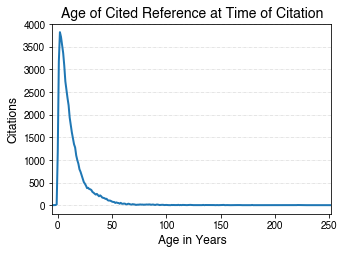

In [12]:
plt.rcParams["font.family"] = "Helvetica"

fig = plt.figure(figsize=(5,3.5))

ax = fig.add_subplot()

# figure formatting
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-5,252)
plt.grid(color='#CCCCCC', linestyle='-.', linewidth=0.5, axis='y')
plt.ylabel('Citations', fontsize=12)
plt.xlabel('Age in Years', fontsize=12)
plt.title('Age of Cited Reference at Time of Citation', fontsize=14)
ax.set_facecolor('#ffffff')

# add data to the plot
plt.plot(citationAges, linewidth=2.0)
plt.show()

#### Very interesting.

__Now save as an image__

In [13]:
fig.savefig('AgeFig.png', dpi=300)

#### Now let's turn our attention toward the most cited titles.

#### Isolate Journal and Book Titles

In [14]:
citedRefsMeta['journal_book']

0                                     Climatic Change
1                              Monthly Weather Review
2        Journal of Geophysical Research: Atmospheres
3                                  Journal of Climate
4                        Geophysical Research Letters
                             ...                     
55124                                             NaN
55125                            Minerals Engineering
55126                                             NaN
55127                                             NaN
55128                            Geoscience Frontiers
Name: journal_book, Length: 55129, dtype: object

**Follow up**: You may notice the appears of Nan or null values in the 'journal_book' column. We will ignore these for now, but note how many there are for future data clean up.

In [15]:
citedRefsMeta['journal_book'].isna().sum()

11261

In [16]:
citedRefsMeta['citedDOI'].isna().sum()

10618

#### Take Counts for each title

The following five cells leads you through the steps needed to visualize the 80/20 rule (do 80% of citations come from 20% of titles). You will:
- count the number of times a journal title is cited
- create a cumulative summation of the counts
- calculate the title percent (each additional title is what percent of the total?)
- calculate the citation percent (each title accounts for what percent of total citations?)

In [17]:
citedRefsMeta_count = citedRefsMeta['journal_book'].value_counts().rename_axis('journal_book').reset_index(name='counts')
citedRefsMeta_count.head(10)

,journal_book,counts
0,Journal of Geophysical Research,2476
1,Geophysical Research Letters,2434
2,Journal of Climate,1241
3,Science,1222
4,Atmospheric Chemistry and Physics,1222
5,Nature,1070
6,Journal of Geophysical Research: Atmospheres,1009
7,Earth and Planetary Science Letters,827
8,Journal of Geophysical Research: Space Physics,792
9,Journal of the Atmospheric Sciences,734


In [18]:
citedRefsMeta_count['cumsum'] = citedRefsMeta_count['counts'].cumsum()
citedRefsMeta_count

,journal_book,counts,cumsum
0,Journal of Geophysical Research,2476,2476
1,Geophysical Research Letters,2434,4910
2,Journal of Climate,1241,6151
3,Science,1222,7373
4,Atmospheric Chemistry and Physics,1222,8595
...,...,...,...
2705,Ancient Water Technologies,1,43864
2706,The Ocean Carbon Cycle and Climate,1,43865
2707,Geology Today,1,43866
2708,Japanese Journal of Applied Physics,1,43867


In [19]:
citedRefsMeta_count['titlenum'] = range(1, 1+len(citedRefsMeta_count))
citedRefsMeta_count

,journal_book,counts,cumsum,titlenum
0,Journal of Geophysical Research,2476,2476,1
1,Geophysical Research Letters,2434,4910,2
2,Journal of Climate,1241,6151,3
3,Science,1222,7373,4
4,Atmospheric Chemistry and Physics,1222,8595,5
...,...,...,...,...
2705,Ancient Water Technologies,1,43864,2706
2706,The Ocean Carbon Cycle and Climate,1,43865,2707
2707,Geology Today,1,43866,2708
2708,Japanese Journal of Applied Physics,1,43867,2709


In [20]:
citedRefsMeta_count['titlepct'] = 100*(citedRefsMeta_count.titlenum/2715)
citedRefsMeta_count

,journal_book,counts,cumsum,titlenum,titlepct
0,Journal of Geophysical Research,2476,2476,1,0.036832
1,Geophysical Research Letters,2434,4910,2,0.073665
2,Journal of Climate,1241,6151,3,0.110497
3,Science,1222,7373,4,0.147330
4,Atmospheric Chemistry and Physics,1222,8595,5,0.184162
...,...,...,...,...,...
2705,Ancient Water Technologies,1,43864,2706,99.668508
2706,The Ocean Carbon Cycle and Climate,1,43865,2707,99.705341
2707,Geology Today,1,43866,2708,99.742173
2708,Japanese Journal of Applied Physics,1,43867,2709,99.779006


In [21]:
citedRefsMeta_count['citationpct'] = 100*citedRefsMeta_count['cumsum']/(44300)
citedRefsMeta_count.head(10)

,journal_book,counts,cumsum,titlenum,titlepct,citationpct
0,Journal of Geophysical Research,2476,2476,1,0.036832,5.589165
1,Geophysical Research Letters,2434,4910,2,0.073665,11.083521
2,Journal of Climate,1241,6151,3,0.110497,13.884876
3,Science,1222,7373,4,0.147330,16.643341
4,Atmospheric Chemistry and Physics,1222,8595,5,0.184162,19.401806
5,Nature,1070,9665,6,0.220994,21.817156
6,Journal of Geophysical Research: Atmospheres,1009,10674,7,0.257827,24.094808
7,Earth and Planetary Science Letters,827,11501,8,0.294659,25.961625
8,Journal of Geophysical Research: Space Physics,792,12293,9,0.331492,27.749436
9,Journal of the Atmospheric Sciences,734,13027,10,0.368324,29.406321


## Plot 80/20 rule

First figure out how many titles are represented in the top 20% of titles

In [22]:
n = len(citedRefsMeta_count.loc[citedRefsMeta_count['citationpct'] <= 80])
n

227

The cell below will tell you what percent of titles are represented by 80% of the total citations?

In [23]:
pctile = citedRefsMeta_count.titlepct[n]
pctile

8.397790055248619

Plot 80/20 rule using the code below:

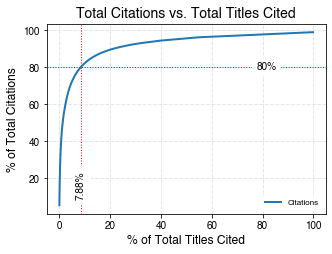

In [24]:
fig2 = plt.figure(figsize=(5,3.5))
ax = fig2.add_subplot()

# figure formatting
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='#CCCCCC', linestyle='-.', linewidth=.5)
plt.ylabel('% of Total Citations', fontsize=12)
plt.xlabel('% of Total Titles Cited', fontsize=12)
plt.title('Total Citations vs. Total Titles Cited', fontsize=14)
ax.set_facecolor('#ffffff')

# annotations
plt.axhline(y=80, color='r', linestyle=':', linewidth=1, zorder=3)
plt.axvline(x=pctile, color='r', linestyle=':', linewidth=1, zorder=3)
plt.text(6.5,10,'7.88%', fontsize=10, rotation=90, bbox=dict(facecolor='#ffffff', edgecolor='#ffffff'), zorder=5)
plt.text(77.5,79,'80%', fontsize=10, bbox=dict(facecolor='#ffffff', edgecolor='#ffffff'), zorder=5)

# add data
plt.plot('titlepct', 'citationpct', data=citedRefsMeta_count, linewidth=2.0, label='Citations')
plt.legend(facecolor='#ffffff', edgecolor='#ffffff', fontsize=8)
plt.show()

In [25]:
fig2.savefig('8020Fig.png', dpi=300)

## Plot 80/20 rule for your institution

We'll wrap the above steps in functions this time like this:

In [26]:
def summarize(df):
    df = df[df['journal_book'].notnull()]
    df_count = df['journal_book'].value_counts().rename_axis('journal_book').reset_index(name='counts')
    df_count['countpct'] = 100*(df_count['counts']/len(df))
    df_count['cumsum'] = df_count['counts'].cumsum()
    df_count['titlenum'] = range(1, 1+len(df_count))
    df_count['titlepct'] = 100*(df_count.titlenum/len(df_count))
    df_count['citationpct'] = 100*df_count['cumsum']/(len(df))
    return(df_count)

def pctile(df):
    n=len(df.loc[df.citationpct<=80])
    pctile = df.titlepct[n]
    return pctile

#### Now pull each individual institution from the main data into their own dataframes:

In [27]:
ucb = citedRefsMeta.loc[citedRefsMeta['Inst'] == 'Berkeley']
ucla = citedRefsMeta.loc[citedRefsMeta['Inst'] == 'UCLA']
uh = citedRefsMeta.loc[citedRefsMeta['Inst'] == 'Houston']
cub = citedRefsMeta.loc[citedRefsMeta['Inst'] == 'CUBoulder'] 

*Note: it might be helpful to write these to a csv now if you want to review the data for your own institution in excel.*

Now you can run any of the individual institution's data. First run the summarize() function then the pctile() function on the summarize() output. Like this:

In [28]:
ucb_count = summarize(ucb)

In [29]:
ucb_pctile = pctile(ucb_count)

Now plot the individual institution's 80/20 using the same plotting code as before:

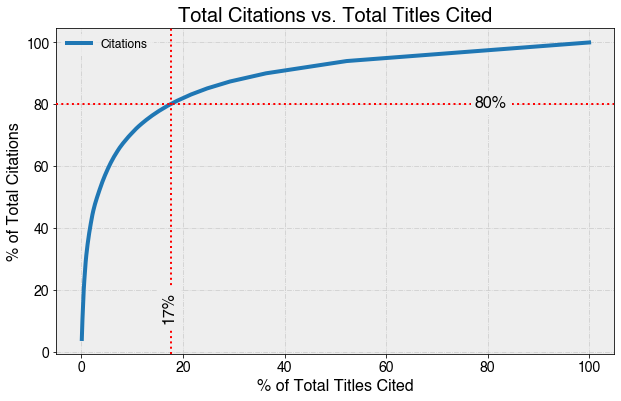

In [30]:
figUCB = plt.figure(figsize=(10,6))
ax = figUCB.add_subplot()

# figure formatting
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(color='#CCCCCC', linestyle='-.', linewidth=.75)
plt.ylabel('% of Total Citations', fontsize=16)
plt.xlabel('% of Total Titles Cited', fontsize=16)
plt.title('Total Citations vs. Total Titles Cited', fontsize=20)
ax.set_facecolor('#eeeeee')

# annotations
plt.axhline(y=80, color='r', linestyle=':', linewidth=2, zorder=3)
plt.axvline(x=ucb_pctile, color='r', linestyle=':', linewidth=2, zorder=3)
plt.text(15.75,10, '17%', fontsize=16, rotation=90, bbox=dict(facecolor='#eeeeee', edgecolor='#eeeeee'), zorder=5)
plt.text(77.5,79,'80%', fontsize=16, bbox=dict(facecolor='#eeeeee', edgecolor='#eeeeee'), zorder=5)

# add data
plt.plot('titlepct', 'citationpct', data=ucb_count, linewidth=4.0, label='Citations')
plt.legend(facecolor='#eeeeee', edgecolor='#eeeeee', fontsize=12)
plt.show()

#### Next we'll run the functions on the remaining institutions:

In [31]:
ucb_count = summarize(ucb)
ucla_count = summarize(ucla)
uh_count = summarize(uh)
cub_count = summarize(cub)
citedRefsMeta_count = summarize(citedRefsMeta)

In [32]:
ucb_pctile = pctile(ucb_count)
ucla_pctile = pctile(ucla_count)
uh_pctile = pctile(uh_count)
cub_pctile = pctile(cub_count)
all_pctile = pctile(citedRefsMeta_count)


print('ucb percentile: ', ucb_pctile)
print('ucla percentile: ', ucla_pctile)
print('uh percentile: ', uh_pctile)
print('cub percentile: ', cub_pctile)
print('All percentile: ', all_pctile)

ucb percentile:  17.542748575047497
ucla percentile:  15.021097046413502
uh percentile:  34.11371237458194
cub percentile:  9.186535764375876
All percentile:  7.9335793357933575


#### Now plot them all!

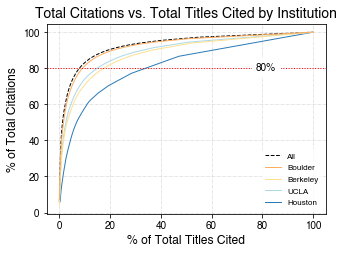

In [33]:
fig3 = plt.figure(figsize=(5,3.5))
ax = fig3.add_subplot()

# figure formatting
plt.grid(color='#CCCCCC', linestyle='-.', linewidth=.5, zorder=0)
plt.title('Total Citations vs. Total Titles Cited by Institution', fontsize=14, fontname="Helvetica")
plt.ylabel('% of Total Citations', fontsize=12, fontname="Helvetica")
plt.xlabel('% of Total Titles Cited', fontsize=12, fontname="Helvetica")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.set_facecolor('#ffffff')

# plot the data
plt.plot('titlepct', 'citationpct', data=citedRefsMeta_count, linewidth=1, color='#000000', ls='--', label = 'All', zorder=1)
plt.plot('titlepct', 'citationpct', data=cub_count, linewidth=1, color='#fdae61', label = 'Boulder', zorder=5)
plt.plot('titlepct', 'citationpct', data=ucb_count, linewidth=1, color='#fee090', label = 'Berkeley', zorder=4)
plt.plot('titlepct', 'citationpct', data=ucla_count, linewidth=1, color='#abd9e9', label = 'UCLA', zorder=3)
plt.plot('titlepct', 'citationpct', data=uh_count, linewidth=1, color='#2c7bb6', label = 'Houston', zorder=2)

# annotation
plt.axhline(y=80, color='r', linestyle=':', linewidth=1, zorder=6)
plt.text(77.5,79,'80%', fontsize=10, fontname="Helvetica", bbox=dict(facecolor='#ffffff', edgecolor='#ffffff'), zorder=7)
plt.legend(facecolor='#ffffff', edgecolor='#ffffff', fontsize=8)
plt.show()

In [34]:
fig3.savefig('8020AllFig.png', dpi=300)

Done-zo

Anonymized chart:

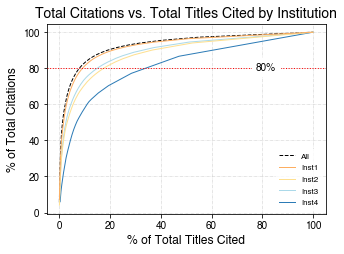

In [35]:
fig3 = plt.figure(figsize=(5,3.5))
ax = fig3.add_subplot()

# figure formatting
plt.grid(color='#CCCCCC', linestyle='-.', linewidth=.5, zorder=0)
plt.title('Total Citations vs. Total Titles Cited by Institution', fontsize=14, fontname="Helvetica")
plt.ylabel('% of Total Citations', fontsize=12, fontname="Helvetica")
plt.xlabel('% of Total Titles Cited', fontsize=12, fontname="Helvetica")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.set_facecolor('#ffffff')

# plot the data
plt.plot('titlepct', 'citationpct', data=citedRefsMeta_count, linewidth=1, color='#000000', ls='--', label = 'All', zorder=1)
plt.plot('titlepct', 'citationpct', data=cub_count, linewidth=1, color='#fdae61', label = 'Inst1', zorder=5)
plt.plot('titlepct', 'citationpct', data=ucb_count, linewidth=1, color='#fee090', label = 'Inst2', zorder=4)
plt.plot('titlepct', 'citationpct', data=ucla_count, linewidth=1, color='#abd9e9', label = 'Inst3', zorder=3)
plt.plot('titlepct', 'citationpct', data=uh_count, linewidth=1, color='#2c7bb6', label = 'Inst4', zorder=2)

# annotation
plt.axhline(y=80, color='r', linestyle=':', linewidth=1, zorder=6)
plt.text(77.5,79,'80%', fontsize=10, fontname="Helvetica", bbox=dict(facecolor='#ffffff', edgecolor='#ffffff'), zorder=7)
plt.legend(facecolor='#ffffff', edgecolor='#ffffff', fontsize=8)
plt.show()

In [36]:
fig3.savefig('8020AllFig_Anon.png', dpi=300)

### Notes and some references:

*Note: on splitting & stacking method*  
For each row, take column 'CR', split it at ; and append new row, keeping DOI and Institution
https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
https://gist.github.com/jlln/338b4b0b55bd6984f883

CrossRef API documentation: https://github.com/CrossRef/rest-api-doc